In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (10, 6)

| Variable | Description                                                                                            |
|----------|--------------------------------------------------------------------------------------------------------|
| Bad      | 1 = customer defaulted on the loan or is seriously delinquent 0 = customer is current on loan payments |
| CLAge    | Age of oldest credit line in months                                                                    |
| CLNo     | Number of credit lines                                                                                 |
| DebtInc  | Debt-to-income ratio                                                                                   |
| Delinq   | Number of delinquent credit lines                                                                      |
| Derog    | Number of major derogatory reports                                                                     |
| Job      | Occupational category                                                                                  |
| Loan     | Requested loan amount                                                                                  |
| MortDue  | Amount due on existing mortgage                                                                        |
| nInq     | Number of recent credit inquiries                                                                      |
| Reason   | DebtCon = debt consolidation HomeImp = home improvement                                                |
| Value    | Value of current property                                                                              |
| YoJ      | Years at present job                                                                                   |

Style görünümü için [nbviewer](https://nbviewer.jupyter.org/github/Kodluyoruz-Ankara-Veri-Bilimi/muratacikgoz/blob/master/2_hmelq.ipynb) üzerinden inceleyin!

In [2]:
df = pd.read_csv('hmelq.csv')

In [3]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.000,108355.000,HomeImp,NaN,28.000,0.000,0.000,139.140,0.000,14.000,34.042
1,0,12600,103960.000,127384.000,DebtCon,NaN,2.000,0.000,0.000,129.020,0.000,25.000,34.479
2,0,18000,46865.000,61266.000,DebtCon,NaN,5.000,0.000,0.000,102.590,2.000,9.000,26.354


In [4]:
aio.describe(df)

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
bad,int64,3576,0.199,0.400,0,0.000,1,0,80.062%,2,2863,0,19.938%,0.000%
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3262,74013.908,44016.834,2619.000,65858.000,399550.000,314,0.000%,3095,6,50000.000,3.747%,0.000%
value,float64,3512,101076.923,54865.275,8800.000,89183.000,850000.000,64,0.000%,3302,9,80000.000,5.537%,0.000%
reason,object,3429,NaN,NaN,NaN,NaN,NaN,147,0.000%,2,2371,DebtCon,NaN,NaN
job,object,3409,NaN,NaN,NaN,NaN,NaN,167,0.000%,6,1431,Other,NaN,NaN
yoj,float64,3264,8.833,7.568,0.000,7.000,41.000,312,6.907%,86,247,0.000,1.370%,0.000%
derog,float64,3149,0.262,0.865,0.000,0.000,10.000,427,75.671%,11,2706,0.000,12.388%,0.000%
delinq,float64,3225,0.433,1.099,0.000,0.000,15.000,351,70.386%,12,2517,0.000,19.799%,0.000%
clage,float64,3397,179.833,87.066,0.490,173.640,1168.230,179,0.000%,3050,7,102.500,0.951%,0.000%


### Null Grafiği

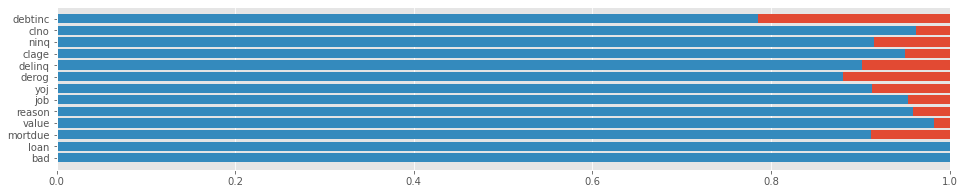

In [5]:
plt.figure(figsize=(16,3))
aio.nullbar(df)

- En çok null değer debtinc kolonunda görünüyor, sayısal değerlere oranla object null değerler azınlıkta kalıyor.
- Hedef değişkeninde ve istenen loan miktarında null değer bulunmamaktadır.

### Uniq Değerler

In [6]:
aio.unique(df,'obj')

reason : ['HomeImp' 'DebtCon' nan]
--------------------------------------------------------------------------------
job : [nan 'Mgr' 'Office' 'Other' 'ProfEx' 'Sales' 'Self']
--------------------------------------------------------------------------------


### Korelasyon

In [16]:
df.iloc[:,1:].corr().style.background_gradient(axis=None)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983
debtinc,0.093636,0.167358,0.134187,-0.052290,0.032324,0.076943,-0.042852,0.133751,0.180983,1.000000


- En yüksek korele mortdue ve value arasında gözlemleniyor.
- Genel tabloya bakılırsa, aralarındaki ilişki oldukça düşük görünüyor. Yoğun renkler malvarlığı ve ipotekte yer almaktadır.

In [7]:
dfCopy = df.copy()

In [8]:
dfCopy['reason'].fillna('DebtCon', inplace = True)
dfCopy['job'].fillna('Other', inplace = True)
dfCopy['derog'].fillna(0, inplace = True)
dfCopy['delinq'].fillna(0, inplace = True)

for col in dfCopy.isnull().sum()[dfCopy.isnull().sum() != 0].index:
    jr_mean = pd.DataFrame(dfCopy.groupby(['job','reason'])[col].mean())
    for j in dfCopy.job.unique():
        for i in dfCopy.reason.unique():
            dfCopy.loc[dfCopy[col].isna() == True, col] = jr_mean.xs((j,i))[0]
            
dfCopy.yoj = dfCopy.yoj.round(1)
dfCopy.clno = dfCopy.clno.round(0)
dfCopy.ninq = dfCopy.ninq.round(0)
#dfCopy.yoj.replace(0, 0.00001, inplace = True)

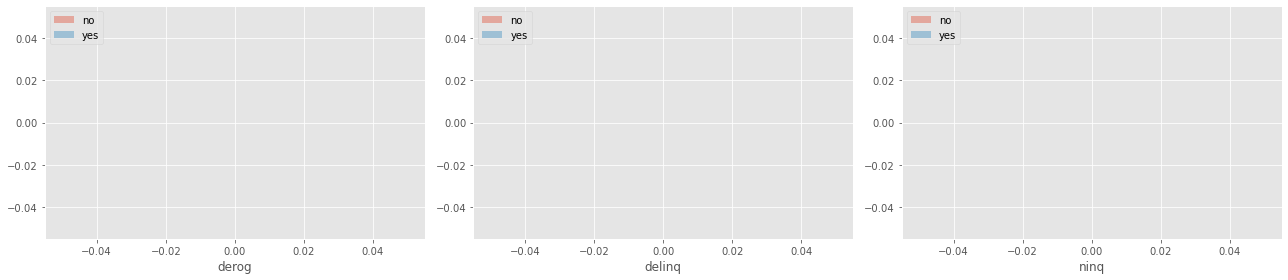

In [9]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 'no'], label='no', hist=True)
    sns.distplot(dfCopy[col][dfCopy.bad == 'yes'], label='yes', hist=True)
    plt.tight_layout()
    plt.legend()

In [199]:
aio.describe(dfCopy)

,dtype,count,mean,std,min,median,max,dupe,null,zero,unique,freq,top,upout,lowout
bad,object,3576,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,2863,no,NaN,NaN
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3576,72390.709,42363.753,2619.000,62101.500,399550.000,0,0,0.000%,3096,314,55528.045,5.257%,0.000%
value,float64,3576,100646.022,54465.598,8800.000,88322.500,850000.000,0,0,0.000%,3303,64,77000.332,5.677%,0.000%
reason,object,3576,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,2518,DebtCon,NaN,NaN
job,object,3576,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,6,1598,Other,NaN,NaN
yoj,float64,3576,8.917,7.235,0.000,8.000,41.000,0,0,6.907%,85,313,9.800,3.440%,0.000%
derog,float64,3576,0.230,0.816,0.000,0.000,10.000,0,0,87.612%,11,3133,0.000,12.388%,0.000%
delinq,float64,3576,0.390,1.052,0.000,0.000,15.000,0,0,80.201%,12,2868,0.000,19.799%,0.000%
clage,float64,3576,179.796,84.859,0.490,177.855,1168.230,0,0,0.000%,3051,179,179.109,1.230%,0.000%


In [11]:
def catDerog(col):
    if col == 0:
        return 'dg0'
    if col >= 1 and col < 3:
        return 'dg1'
    if col >= 3:
        return 'dg2'
    
def catDelinq(col):
    if col == 0:
        return 'dl0'
    if col >= 1 and col < 3:
        return 'dl1'
    if col >= 3:
        return 'dl2'
    
def catNinq(df):
    if df.ninq == 0:
        return 'nq0'
    if df.ninq >= 1 and df.ninq < 3:
        return 'nq1'
    if df.ninq >= 3 and df.ninq < 6:
        return 'nq2'
    if df.ninq >= 6:
        return 'nq3'
    

dfCopy['derog'] = dfCopy.apply(lambda dfCopy:catDerog(dfCopy.derog), axis=1)
dfCopy['delinq'] = dfCopy.apply(lambda dfCopy:catDelinq(dfCopy.delinq), axis=1)
dfCopy['ninq'] = dfCopy.apply(lambda dfCopy:catNinq(dfCopy), axis=1)

In [23]:
dms = pd.get_dummies(dfCopy[['derog','delinq','ninq','reason','job']])

In [24]:
X_ = dfCopy.drop(['derog','delinq','ninq','reason','job'], axis=1)
dfDummy = pd.concat([X_,dms], axis=1)

In [25]:
dfDummy.head(3)

,bad,loan,mortdue,value,yoj,clage,clno,debtinc,derog_dg0,derog_dg1,...,ninq_nq2,ninq_nq3,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,81200,18834.000,108355.000,28.000,139.140,14.000,34.042,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,12600,103960.000,127384.000,2.000,129.020,25.000,34.479,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,18000,46865.000,61266.000,5.000,102.590,9.000,26.354,1,0,...,0,0,1,0,0,0,1,0,0,0


# Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_curve, roc_auc_score, log_loss

In [26]:
y = dfDummy.bad
X = dfDummy.drop(['bad'], axis=1)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [51]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [77]:
model = LogisticRegression(solver='liblinear')
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[564,  27],
       [ 83,  42]], dtype=int64)

In [36]:
from sklearn.preprocessing import StandardScaler


In [79]:
def cValue(X, Y):
    c_values = [0.001,0.01,0.1,1,10,100, 1000]
    t_values = pd.DataFrame(columns=['c_values', 't_train', 't_test'])
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    for c in c_values:
        lr = LogisticRegression(solver='liblinear', C = c, random_state = 42).fit(x_train, y_train)
        t_values = t_values.append({'c_values': c, 't_train' : lr.score(x_train, y_train), 't_test': lr.score(x_test, y_test)}, ignore_index=True)

    return t_values
cValue(X, y)

,c_values,t_train,t_test
0,0.001,0.822,0.823
1,0.010,0.833,0.841
2,0.100,0.835,0.844
3,1.000,0.835,0.846
4,10.000,0.835,0.846
5,100.000,0.835,0.846
6,1000.000,0.835,0.846


In [80]:
def confMatrix(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    
    logr = LogisticRegression().fit(x_train, y_train)

    y_pred = logr.predict(x_test)
    y_prob = logr.predict_proba(x_test)[:,1]
    
    dfMatrix = pd.concat([pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1']), 
               pd.DataFrame(precision_recall_fscore_support(y_test, y_pred), index=['precision', 'recall', 'f1-score', 'support']).T],
               ignore_index=False, axis=1)
    print("Model Score (Accuracy):", '%.5f' % logr.score(x_test, y_test))
    return dfMatrix

In [81]:
confMatrix(X, y)

Model Score (Accuracy): 0.84637


,pred_0,pred_1,precision,recall,f1-score,support
0,564,27,0.872,0.954,0.911,591.000
1,83,42,0.609,0.336,0.433,125.000


In [84]:
def valCurve(X, Y)  :
         
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)

    logr = LogisticRegression().fit(x_train, y_train)

    y_pred = logr.predict(x_test)
    y_prob = logr.predict_proba(x_test)[:,1]

    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds  = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Recall/Precision Curve')
    
    return

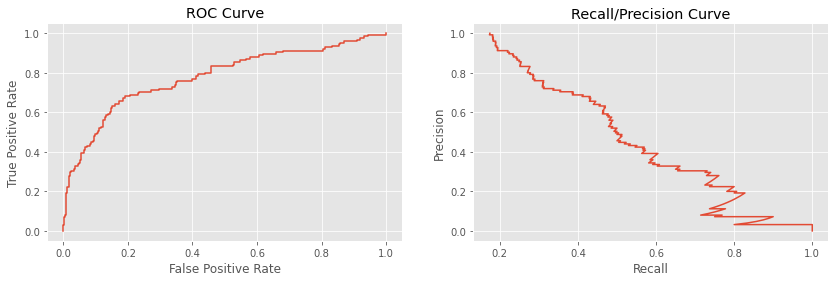

In [85]:
plt.figure(figsize=(14,4))
valCurve(X, y)

In [94]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    model = LogisticRegression().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    y_prob = model.predict_proba(x_test)[:,1]
    
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

    df = pd.Series({'train_score': accuracy_score(y_train,y_train_pred),
                    'test_score': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred),
                    'auc-roc': roc_auc_score(y_test, y_prob),
                    'cross-val': cross_val_score(estimator = LogisticRegression(), X=X, y=y, cv=k_fold).mean()}, name = idx)
    return df

In [95]:
from sklearn.model_selection import  cross_val_score, KFold

dfModel = pd.DataFrame(columns = ['cross-val', 'train_score', 'test_score', 'precision', 'recall', 'f1-score', 'auc-roc'])
dfModel = dfModel.append(modelFrame(X, y, 'log'))

In [93]:
dfModel = dfModel.append(modelFrame(X, y, 'log_scale'))
dfModel

,cross-val,train_score,test_score,precision,recall,f1-score,auc-roc
log,0.801,0.795,0.827,0.667,0.016,0.031,0.632
log_scale,0.801,0.835,0.846,0.609,0.336,0.433,0.778
